### 1) Show that (A,B) is controllable iff (AT,BT) is observable. This links the question of controllability for the original system with the observation problem of the dual system (from previous hw). This is why sometimes it is said that control and observation are "dual" problems.

Consider the system 
$$ \dot x = Ax+Bu.$$ and its dual system
$$ \dot x_D = A^T x_D +B^T u_D$$
For the first system, it is controllable if and only if the controllability matrix $\mathcal{C} = \begin{bmatrix}B, AB, A^2B, \cdots, A^{n-1}B \end{bmatrix}$ has full rank n. Its dual system is obsservable if and only if $\mathcal{O}_D = \begin{bmatrix}B^T\\ B^TA^T\\\vdots\\ B^T(A^T)^{(n-1)} \end{bmatrix}$ has full rank n. Since $\mathcal{O}_D^T = \mathcal{C}$, (A, B) is controllable if and only if $(A^T,B^T)$ is reachable.


### 2）Consider the system:
$$\Large \dot x = \begin{bmatrix} 0 & 1 &0&0\\ -0.1910 & -0.0536 &-0.1910&0.0036\\0&0&0&1\\0.1910&0.0036&0.1910&-0.0536\end{bmatrix} x + \begin{pmatrix} 0&0 \\ 1&0\\0&0\\0&-1 \end{pmatrix} f.$$

$$\Large y = Cx$$
where $$\Large C = \begin{bmatrix}1&0&0&0\\0&1&0&0\end{bmatrix}$$
### Use a computer to determine if this system is observable. If so, numerically solve for y(t) on the interval t∈(0,1) with initial condition x(0)=(1,1,1,1)T, with controls f1,f2 set to zero, and then solve for x(0) using the observability Grammian (which you will have to choose how to approximate).

The observability matrix is:
$$\mathcal{O} = \begin{bmatrix}C^T &(CA)^T &(CA^2)^T &(CA^3)^T \\ \end{bmatrix}$$

In [152]:
import numpy as np
A = np.array([[0, 1, 0, 0], 
    [-0.1910 , -0.0536 ,-0.1910, 0.0036],
    [0, 0, 0, 1],
    [0.1910,0.0036,0.1910,-0.0536]])
C = np.array([[1,0,0,0],[0,1,0,0]])
O = np.block([[C.T,(C@A).T,(C@A@A).T,(C@A@A@A).T]])
print(O)

[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 -1.91000000e-01
  -1.91000000e-01  1.09252000e-02  1.09252000e-02 -6.24921440e-04]
 [ 0.00000000e+00  1.00000000e+00  1.00000000e+00 -5.36000000e-02
  -5.36000000e-02 -1.88114080e-01 -1.88114080e-01  2.03191254e-02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.91000000e-01
  -1.91000000e-01  1.09252000e-02  1.09252000e-02 -6.24921440e-04]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  3.60000000e-03
   3.60000000e-03 -1.91385920e-01 -1.91385920e-01  2.05062746e-02]]


In [153]:
from scipy import linalg
U, S, VT = linalg.svd(O, full_matrices = False)
print(S)

[1.44219564 1.03840082 0.27448821 0.25197238]


In [154]:
### Count the number of non-zero sigular value
count = 0
for s in S:
    if np.abs(s-0)>10**(-5):
        count+=1
print(count)

4


Since the number of non-zero sigular value is 4, the rank of observability matrix $\mathcal{O}$ is 4. That implies observability matrix has full rank. Therefore, this system is observable.

When $$f_1 = 0, f_2 = 0,$$ the system becomes $$\dot x = Ax, y(t) =Cx(t).$$
First, we solve the ODE and then multiply it with matrix C.

In [155]:
n = 1000
t = np.linspace(0,1,n)

def RHS(x, t):
    
    A = np.array([[0, 1, 0, 0], 
    [-0.1910 , -0.0536 ,-0.1910, 0.0036],
    [0, 0, 0, 1],
    [0.1910,0.0036,0.1910,-0.0536]])
    
    dydt = A.dot(x) 
    return dydt

from scipy.integrate import odeint

x0 = np.array([1,1,1,1])

sol = odeint(RHS, x0, t)

y = C@sol.T
print(y)

[[1.         1.00100078 1.00200114 ... 1.72522052 1.72561771 1.72601413]
 [1.         0.99956739 0.99913442 ... 0.39718057 0.39640989 0.39563889]]


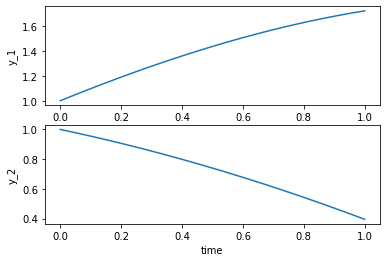

In [156]:
import matplotlib.pyplot as plt

%matplotlib inline

fig, axs = plt.subplots(2, 1)
axs[0].plot(t,y[0,:])
axs[0].set_ylabel('y_1')
axs[0].set_xlabel('time')
axs[1].plot(t,y[1,:])
axs[1].set_ylabel('y_2')
axs[1].set_xlabel('time')

plt.show()

Here, $$y(t) = C\Phi(1,0)x_0$$
The observability gramian is:
$$W_o(0,1) = \int_0^1\Phi^\top(\tau,0)C^\top C\Phi(\tau,0) d\tau$$
We can estimate this integral by taking limit of riemann sum, i.e. step n = 1000. Or we can directly solve for $W_o$ using the equation below.
The observability gramian can be found as the solution of the Lyapunov equation given by

$$\displaystyle {\boldsymbol {A^{T}}}{\boldsymbol {W}}_{o}(0,1)+{\boldsymbol {W}}_{o}(0,1){\boldsymbol {A}}={\boldsymbol {e^{A^\top}C^{\top}Ce^A - C^{\top}C}}$$
It can be direved as :

$$\displaystyle {\begin{array}{ccccc}{\boldsymbol {A^{T}}}{\boldsymbol {W}}_{o}+{\boldsymbol {W}}_{o}{\boldsymbol {A}}&=&\int _{0}^{1}{\boldsymbol {A^{T}}}e^{{\boldsymbol {A^{T}}}\tau }{\boldsymbol {C^{T}C}}e^{{\boldsymbol {A}}\tau }d\tau &+&\int _{0}^{1 }e^{{\boldsymbol {A^{T}}}\tau }{\boldsymbol {C^{T}C}}e^{{\boldsymbol {A}}\tau }{\boldsymbol {A}}d\tau \\&=&\int _{0}^{1 }{\frac {d}{d\tau }}(e^{{\boldsymbol {A^{T}}}\tau }{\boldsymbol {C}}^{T}{\boldsymbol {C}}e^{{\boldsymbol {A}}\tau })d\tau &=&e^{{\boldsymbol {A^{T}}}t}{\boldsymbol {C}}^{T}{\boldsymbol {C}}e^{{\boldsymbol {A}}t}|_{t=0}^{1 }\\&=&{\boldsymbol {e^{A^\top}C^{T}Ce^A - C^{T}C}}\end{array}}$$
Given y(t), we can reconstruct the state at time 0 by
$$x_0 = W_0^{-1}(0,1)\int_0^1\Phi^\top(\tau,0)C^\top y(\tau) d\tau$$
In this case, we can rewrite the state transition matrix as matrix exponential.
$$x_0 = W_0^{-1}(0,1)\int_0^1 e^{\tau A^\top} C^\top y(\tau) d\tau$$
We can approximate the integration by riemann sum.

In [157]:
import scipy.linalg as la
### Solve for observability gramian W_o
q = la.expm(A.T)@C.T@C@la.expm(A) - C.T@C
a = A.T
W_o = la.solve_lyapunov(a, q)
print(np.linalg.inv(W_o))

[[ 1.81250203e+00 -4.11203805e+00 -4.07054435e+01  6.08187308e+00]
 [-4.11125393e+00  2.38295168e+01  2.48777859e+02 -3.62215784e+01]
 [-4.06813428e+01  2.48679701e+02  2.69800506e+03 -3.83271541e+02]
 [ 6.02950777e+00 -3.58991276e+01 -3.79915955e+02  5.48359348e+01]]


/Users/ycui25/opt/anaconda3/lib/python3.8/site-packages/scipy/linalg/_solvers.py:191: RuntimeWarning: Input "a" has an eigenvalue pair whose sum is very close to or exactly zero. The solution is obtained via perturbing the coefficients.
  warnings.warn('Input "a" has an eigenvalue pair whose sum is '


In [134]:
sum_1 = 0
for i in range(n):
    sum_1 += la.expm(t[i]*A.T)@C.T@y[:,i]*(1/n)
print(sum_1)

[ 1.3047606   1.4328491  -0.10861222 -0.0283882 ]


In [135]:
x_0 = np.linalg.inv(W_o)@sum_1.T
print(x_0)

[ 0.72140623  2.78785034 21.08515214 -3.86414812]


In [136]:
W_o_sum = 0
for i in range(n):
    W_o_sum += la.expm(t[i]*A.T)@C.T@C@la.expm(t[i]*A)*(1/n)
print(W_o_sum)

[[ 0.95063024  0.3747385  -0.017971   -0.00263713]
 [ 0.3747385   1.19876899 -0.10864508 -0.0320133 ]
 [-0.017971   -0.10864508  0.01342776  0.0045761 ]
 [-0.00263713 -0.0320133   0.0045761   0.00168613]]


In [137]:
x_0 = np.linalg.inv(W_o_sum)@sum_1.T
print(x_0)

[0.99999999 1.         1.00000024 0.99999952]


The relative error between the true $x_0$ and the reconstructed $x_0$ by sovling Lyapunov equation is significant. That's because $A^\top$ has an eigenvalue pair whose sum is very close to or exactly zero. The observability gramian is obtained via perturbing the coefficients, so it may contain errors. While, the method of using riemann sum, the solution of $x_0$ is very close to $\begin{bmatrix}1,1,1,1\end{bmatrix}^\top$.

### 3) Consider the system
$$\Large \dot x = \begin{bmatrix} -0.0507 & -3.861 &0&-32.2\\ -0.00117 & -0.5164 &1&0\\-0.000129&1.4168&-0.4932&0\\0&0&1&0\end{bmatrix} x + \begin{pmatrix} 0 \\ -0.0717\\- 1 . 6 45\\0 \end{pmatrix} u.$$

$$\Large y = Cx$$
where $$\Large C = \begin{bmatrix}0&1&0&0\\0&0&1&0\end{bmatrix}$$
### Use a computer to determine if this system is observable. If so, numerically solve for y(t) on the interval t∈(0,1) with initial condition x(0)=(1,1,1,1)T, for control value u=0, and then solve for x(0) using the observability Grammian (which you will have to choose how to approximate).

The observability matrix is:
$$\mathcal{O} = \begin{bmatrix}C^T &(CA)^T &(CA^2)^T &(CA^3)^T \\ \end{bmatrix}$$

In [116]:
import numpy as np
A = np.array([[-0.0507, -3.861, 0, -32.2], 
    [-0.00117 , -0.5164 ,1, 0],
    [-0.000129, 1.4168, -0.4932, 0],
    [0,0,1,0]])
C = np.array([[0,1,0,0],[0,0,1,0]])
O = np.block([[C.T,(C@A).T,(C@A@A).T,(C@A@A@A).T]])
print(O)

[[ 0.00000000e+00  0.00000000e+00 -1.17000000e-03 -1.29000000e-04
   5.34507000e-04 -1.58749290e-03 -1.87180511e-03  1.53932668e-03]
 [ 1.00000000e+00  0.00000000e+00 -5.16400000e-01  1.41680000e+00
   1.68798633e+00 -1.42990321e+00 -2.30414115e+00  3.09648484e+00]
 [ 0.00000000e+00  1.00000000e+00  1.00000000e+00 -4.93200000e-01
  -1.00960000e+00  1.66004624e+00  2.22359505e+00 -2.24448422e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   3.76740000e-02  4.15380000e-03 -1.72111254e-02  5.11172714e-02]]


In [117]:
rank_O = np.linalg.matrix_rank(O)
print(rank_O)

4


Since the number of non-zero sigular value is 4, the rank of observability matrix $\mathcal{O}$ is 4. That implies observability matrix has full rank. Therefore, this system is observable.

When $$u=0,$$ the system becomes $$\dot x = Ax, y(t) =Cx(t).$$
Firstly we solve the ODE and then multiply it with matrix C.

In [118]:
n = 1000
t = np.linspace(0,1,n)

def RHS(x, t):
    
    A = np.array([[-0.0507, -3.861, 0, -32.2], 
    [-0.00117 , -0.5164 ,1, 0],
    [-0.000129, 1.4168, -0.4932, 0],
    [0,0,1,0]])
    
    dxdt = A.dot(x) 
    return dxdt

from scipy.integrate import odeint

x0 = np.array([1,1,1,1])

sol = odeint(RHS, x0, t)

y = C@sol.T
print(y)

[[1.         1.00048327 1.00096726 ... 1.85642664 1.8577108  1.85899595]
 [1.         1.00092451 1.00184926 ... 2.1747073  2.17627432 2.17784241]]


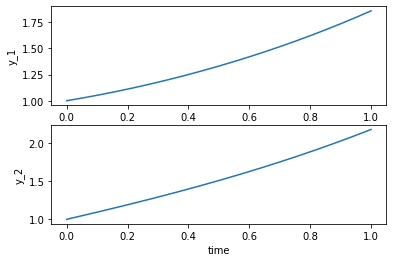

In [119]:
%matplotlib inline

fig, axs = plt.subplots(2, 1)
axs[0].plot(t,y[0,:])
axs[0].set_ylabel('y_1')
axs[0].set_xlabel('time')
axs[1].plot(t,y[1,:])
axs[1].set_ylabel('y_2')
axs[1].set_xlabel('time')

plt.show()

Repeat the process of previous question to reconstruct initial state $x_0$.

In [120]:
import scipy.linalg as la
### Solve for observability gramian W_o
q = la.expm(A.T)@C.T@C@la.expm(A) - C.T@C
a = A.T
W_o = la.solve_lyapunov(a, q)
print(W_o)
print(np.linalg.inv(W_o))

[[ 5.52501385e-07 -7.73690834e-04 -5.80571325e-04 -6.35247480e-06]
 [-7.73690834e-04  1.33015530e+00  9.47735963e-01  8.08257397e-03]
 [-5.80571325e-04  9.47735963e-01  1.14068016e+00  6.06140410e-03]
 [-6.35247480e-06  8.08257397e-03  6.06140410e-03  7.77370232e-05]]
[[ 1.44423073e+08  3.09775589e+04  3.70646902e+03  8.29204783e+06]
 [ 3.09775589e+04  9.59535705e+00 -6.07507099e-01  1.58111695e+03]
 [ 3.70646902e+03 -6.07507099e-01  2.25859566e+00  1.89937953e+02]
 [ 8.29204783e+06  1.58111695e+03  1.89937953e+02  5.11265261e+05]]


In [121]:
sum_1 = 0
for i in range(n):
    sum_1 += la.expm(t[i]*A.T)@C.T@y[:,i]*(1/n)
print(sum_1)

[-1.36060791e-03  2.28558772e+00  2.09420555e+00  1.42279596e-02]


In [122]:
### Reconstruct intial state by sovling Lyapunov equation
x_0 = np.linalg.inv(W_o)@sum_1.T
print(x_0)

[39.78272625  1.0065421   1.00083128  3.58625264]


In [123]:
### Approximate observability gramian by riemann sum
W_o_sum = 0
for i in range(n):
    W_o_sum += la.expm(t[i]*A.T)@C.T@C@la.expm(t[i]*A)*(1/n)
print(W_o_sum)
print(np.linalg.inv(W_o_sum))

[[ 5.52901407e-07 -7.73949633e-04 -5.80851189e-04 -6.35998395e-06]
 [-7.73949633e-04  1.33048435e+00  9.47788144e-01  8.08917417e-03]
 [-5.80851189e-04  9.47788144e-01  1.14093097e+00  6.06728143e-03]
 [-6.35998395e-06  8.08917417e-03  6.06728143e-03  7.78639853e-05]]
[[ 1.43870065e+08  3.08308397e+04  3.71203336e+03  8.25918835e+06]
 [ 3.08308397e+04  9.55443042e+00 -6.04987705e-01  1.57283016e+03]
 [ 3.71203336e+03 -6.04987705e-01  2.25783704e+00  1.90118586e+02]
 [ 8.25918835e+06  1.57283016e+03  1.90118586e+02  5.09245771e+05]]


In [124]:
x_0 = np.linalg.inv(W_o_sum)@sum_1.T
print(x_0)

[1.00001117 1.         1.         1.00000076]


### 4) For the previous problems (in the case where you reconstructed the state), consider what occurs if instead of the trajectory y(t) you use y(t)+η, where η=ϵsin(2πt) . This could model some type of error in the output observation. Numerically consider the effect of different values of ϵ.

Recall the system in question 2), we apply perturbed $y(t) + \eta$ to reconstruct state $x_0$, where $\epsilon$ in [0.0001, 0.001, 0.01, 0.1, 0.5].

In [138]:
n = 1000
t = np.linspace(0,1,n)

def RHS(x, t):
    
    A = np.array([[0, 1, 0, 0], 
    [-0.1910 , -0.0536 ,-0.1910, 0.0036],
    [0, 0, 0, 1],
    [0.1910,0.0036,0.1910,-0.0536]])
    
    dydt = A.dot(x) 
    return dydt

from scipy.integrate import odeint

x0 = np.array([1,1,1,1])

sol = odeint(RHS, x0, t)


for epsilon in [0,0.0001, 0.001, 0.01, 0.1, 0.5]:
    
    eta_ety = epsilon*np.sin(2*np.pi*t)

    eta = np.array([eta_ety,eta_ety])
  
    y = np.add(C@sol.T, eta)
    
  
    sum_1 = 0
    for i in range(n):
        sum_1 += la.expm(t[i]*A.T)@C.T@y[:,i]*(1/n)
    W_o_sum = 0
    for i in range(n):
        W_o_sum += la.expm(t[i]*A.T)@C.T@C@la.expm(t[i]*A)*(1/n)
    x_0 = np.linalg.inv(W_o_sum)@sum_1.T
    print(x_0) 


[0.99999999 1.         1.00000024 0.99999952]
[0.99999158 1.00010107 1.00162556 0.99856835]
[0.99991588 1.00101071 1.01625343 0.98568785]
[0.99915892 1.01010713 1.16253211 0.85688282]
[ 0.99158937  1.10107127  2.62531897 -0.43116746]
[ 0.9579469   1.50535637  9.1265939  -6.15583536]


As the scale of perturbation of y increasing, the reconstructed $x_0$ becomes less accurate. Espectially, $x_3$ and $x_4$ are more sensitive to the perturbation of y.

Repeat the above for system in question 3).

In [125]:
n = 1000
t = np.linspace(0,1,n)

def RHS(x, t):
    
    A = np.array([[-0.0507, -3.861, 0, -32.2], 
    [-0.00117 , -0.5164 ,1, 0],
    [-0.000129, 1.4168, -0.4932, 0],
    [0,0,1,0]])
    
    dxdt = A.dot(x) 
    return dxdt

from scipy.integrate import odeint

x0 = np.array([1,1,1,1])

sol = odeint(RHS, x0, t)

for epsilon in [0,0.0001, 0.001, 0.01, 0.1, 0.5]:
    
    eta_ety = epsilon*np.sin(2*np.pi*t)

    eta = np.array([eta_ety,eta_ety])
  
    y = np.add(C@sol.T, eta)
    
  
    sum_1 = 0
    for i in range(n):
        sum_1 += la.expm(t[i]*A.T)@C.T@y[:,i]*(1/n)
    W_o_sum = 0
    for i in range(n):
        W_o_sum += la.expm(t[i]*A.T)@C.T@C@la.expm(t[i]*A)*(1/n)
    x_0 = np.linalg.inv(W_o_sum)@sum_1.T
    print(x_0) 

[1.00001117 1.         1.         1.00000076]
[1.30044474 1.00011209 1.00001334 1.00651662]
[4.00434684 1.00112093 1.00013334 1.06515938]
[31.04336787  1.01120928  1.00133338  1.65158696]
[301.43357812   1.11209281   1.01333375   7.51586275]
[1.50316785e+03 1.56046405e+00 1.06666874e+00 3.35793107e+01]


As the scale of perturbation of y increasing, the reconstructed $x_0$ becomes less accurate. Espectially, $x_1$ and $x_4$ are more sensitive to the perturbation of y in this case.